In [1]:
import tensorflow as tf
import time
import numpy as np

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
new_model = tf.keras.models.load_model('saved_model_tensorrt_with_NMS/my_model')

In [4]:
file = tf.keras.utils.get_file(
    "persons.jpg",
    "https://www.saltwire.com/media/photologue/photos/cache/STJ-A01-28102019-RawlinsCrossPedestrians3_large.jpg")

In [5]:
image = file
img_raw = tf.image.decode_image(open(image, 'rb').read(), channels=3)
img = tf.expand_dims(img_raw, 0)
_,height,width,_ =img.shape
img = tf.image.resize(img, (416, 416))/255

In [6]:
ayuda2= new_model(img)
print(ayuda2)

tf.Tensor(
[[0.24873674 0.33036786 0.37678713 0.9103138 ]
 [0.47777706 0.2421627  0.611129   0.8420085 ]
 [0.6335489  0.28631288 0.7600512  0.7978144 ]
 [0.08708014 0.32900137 0.1485187  0.5255371 ]
 [0.40229878 0.25115263 0.5324107  0.83888245]
 [0.6761901  0.15234086 0.87192637 0.78450406]], shape=(6, 4), dtype=float32)


In [7]:
%timeit new_model(img)

4.84 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
tiempo = []

for i in range(5000):
    a = time.time()
    _ = new_model(img)
    b = time.time()
    tiempo.append(b-a)
    
print(1/np.mean(tiempo))

196.78539034526372


In [9]:
from scipy.stats import trim_mean
(1/trim_mean(tiempo,0.01))

196.84753193569577

(array([1.061e+06, 1.039e+06, 1.150e+06, 1.714e+06, 3.300e+04, 1.000e+03,
        0.000e+00, 1.000e+03, 0.000e+00, 1.000e+03]),
 array([0.00279069, 0.00383253, 0.00487437, 0.00591621, 0.00695806,
        0.0079999 , 0.00904174, 0.01008358, 0.01112542, 0.01216726,
        0.0132091 ]),
 <a list of 10 Patch objects>)

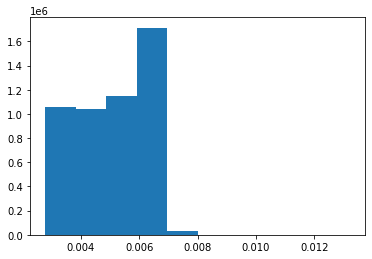

In [10]:
import matplotlib.pyplot as plt
plt.hist(tiempo*1000,bins=10)

In [11]:
tiempo = []
with tf.device("CPU:0"):
    for i in range(100):
        inicio = time.time()
        output = new_model(img)
        fin = time.time()
        tiempo.append(fin-inicio)
        #print(fin-inicio)

In [12]:
(1/trim_mean(tiempo,0.01))

47.908493125713676